In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from aquire import get_titanic_data
from prepare import train_validate_test_split

df = get_titanic_data()
df = df.drop(columns='deck')
df = df[~ df.age.isna()]
df = df[~ df.embarked.isna()]

train, validate, test = train_validate_test_split(df)

In [4]:
train.head(), validate.head(), test.head()

(     passenger_id  survived  pclass   sex   age  sibsp  parch   fare embarked  \
 450           450         0       2  male  36.0      1      2  27.75        S   
 543           543         1       2  male  32.0      1      0  26.00        S   
 157           157         0       3  male  30.0      0      0   8.05        S   
 462           462         0       1  male  47.0      0      0  38.50        S   
 397           397         0       2  male  46.0      0      0  26.00        S   
 
       class  embark_town  alone  
 450  Second  Southampton      0  
 543  Second  Southampton      0  
 157   Third  Southampton      1  
 462   First  Southampton      1  
 397  Second  Southampton      1  ,
      passenger_id  survived  pclass     sex   age  sibsp  parch     fare  \
 610           610         0       3  female  39.0      1      5  31.2750   
 56             56         1       2  female  21.0      0      0  10.5000   
 664           664         1       3    male  20.0      1      0

In [14]:
train.survived.value_counts()

0    237
1    161
Name: survived, dtype: int64

<AxesSubplot:>

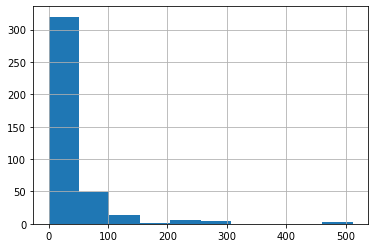

In [15]:
train.fare.hist()

In [26]:
train.fare.value_counts(ascending = False).head()

13.000    22
26.000    17
8.050     16
10.500    14
7.925     12
Name: fare, dtype: int64

Text(0.5, 0, 'Survived')

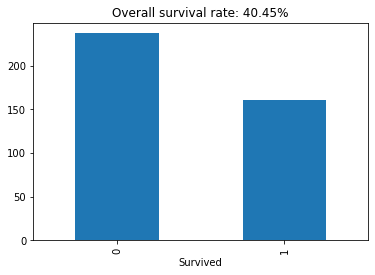

In [6]:
train.survived.value_counts().sort_index().plot.bar()
survival_rate = train.survived.mean()
plt.title(f"Overall survival rate: {survival_rate:.2%}")
plt.xlabel('Survived')

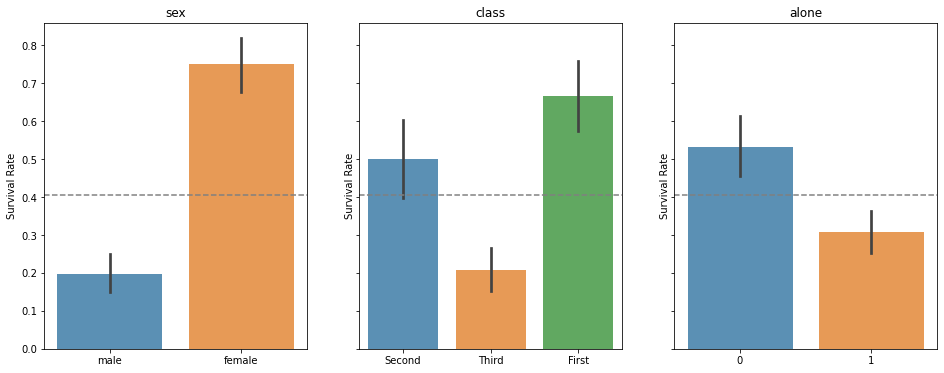

In [28]:
features = ['sex', 'class', 'alone']

survival_rate = train.survived.mean()
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'survived', data=train, ax=ax[i], alpha=.8)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Survival Rate')
    ax[i].set_title(feature)
    ax[i].axhline(survival_rate, ls='--', color='grey')

<AxesSubplot:xlabel='pclass', ylabel='count'>

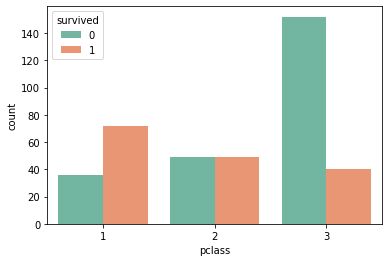

In [41]:
sns.countplot(x='pclass', data=train, hue='survived', palette='Set2')

In [51]:
### continuious vs continuious 

<AxesSubplot:xlabel='age', ylabel='fare'>

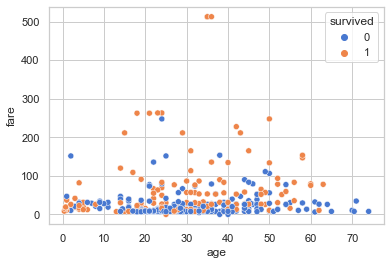

In [53]:
sns.scatterplot(x='age', y='fare', hue= 'survived', data = train)

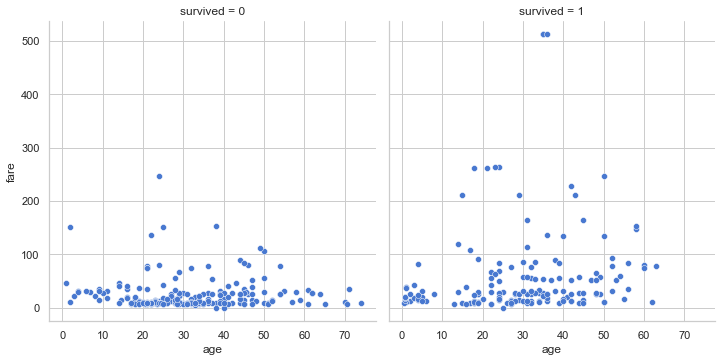

In [55]:
#col is a discrete variable feature in our dataset
sns.relplot(x='age', y='fare', col= 'survived', data = train)

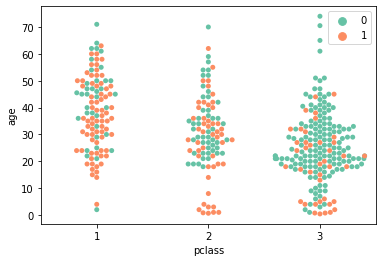

In [42]:
sns.swarmplot(x="pclass", y="age", data=train, hue="survived", palette="Set2")
plt.legend()

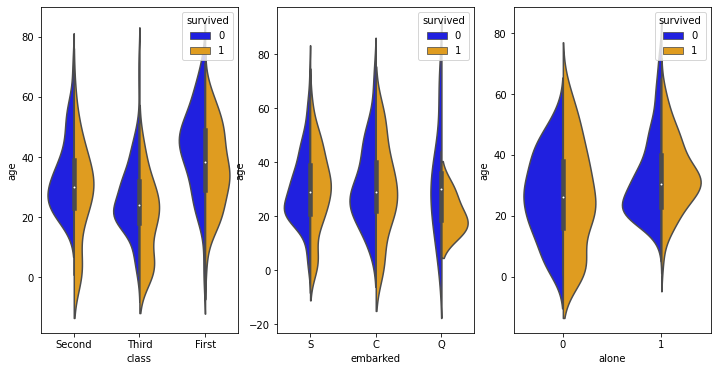

In [43]:
features = ["class", "embarked", "alone"]
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

for i, feature in enumerate(features):
    sns.violinplot(
        feature,
        "age",
        hue="survived",
        data=train,
        split=True,
        ax=ax[i],
        palette=["blue", "orange"],
    )

In [45]:
pd.crosstab(train.pclass, train.survived, margins=True)

survived,0,1,All
pclass,,,
1,36,72,108
2,49,49,98
3,152,40,192
All,237,161,398


(0.0, 175.0)

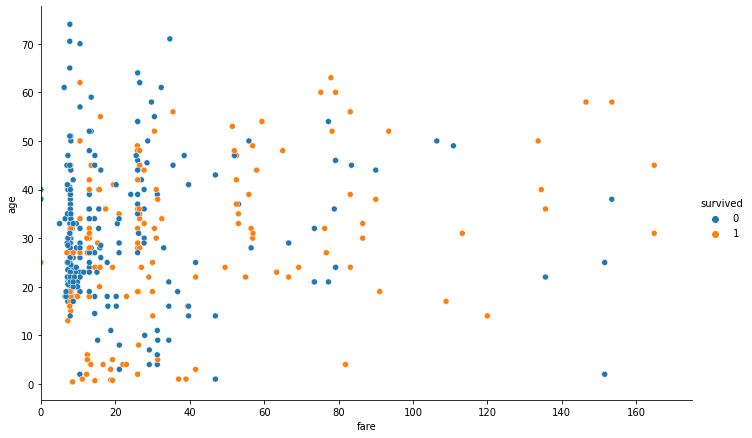

In [46]:
sns.relplot(x="fare", y="age", hue="survived", data=train, height=6, aspect=1.6)
plt.xlim(0, 175)

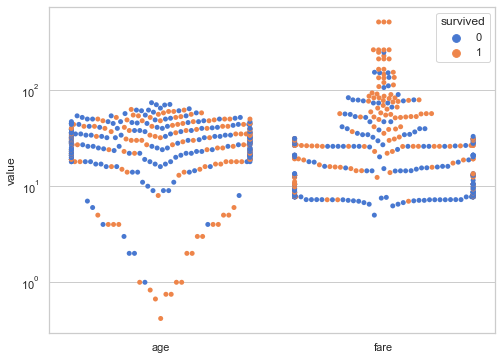

In [47]:
sns.set(style="whitegrid", palette="muted")

# Melt the dataset to "long-form" representation
melt = train[['survived', 'age', 'fare']].melt(id_vars="survived", var_name="measurement")

plt.figure(figsize=(8,6))
p = sns.swarmplot(
    x="measurement",
    y="value",
    hue="survived",
    data=melt,
)
p.set(yscale="log", xlabel='')
plt.show()

In [50]:
from scipy import stats

stats.ttest_ind(
    train[train.survived == 1].age.dropna(),
    train[train.survived == 0].age.dropna(),
)


Ttest_indResult(statistic=-0.8137563508309718, pvalue=0.41627357274555576)

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [ ]:
# Exercises
#Continue in your classification_exercises.ipynb notebook. Use the iris dataset. 
# As always, add, commit, and push your changes.

In [23]:
#1) Split your data into train, validate, and test samples.
from aquire import get_iris_data
from prepare import split
df = get_iris_data()
df = df.drop(columns='species_id')

In [24]:
train, validate, test = split(df)


In [25]:
train.head(), validate.head(), test.head()

(    species_name  sepal_length  sepal_width  petal_length  petal_width
 114    virginica           5.8          2.8           5.1          2.4
 136    virginica           6.3          3.4           5.6          2.4
 53    versicolor           5.5          2.3           4.0          1.3
 19        setosa           5.1          3.8           1.5          0.3
 38        setosa           4.4          3.0           1.3          0.2,
     species_name  sepal_length  sepal_width  petal_length  petal_width
 72    versicolor           6.3          2.5           4.9          1.5
 112    virginica           6.8          3.0           5.5          2.1
 132    virginica           6.4          2.8           5.6          2.2
 88    versicolor           5.6          3.0           4.1          1.3
 37        setosa           4.9          3.6           1.4          0.1,
     species_name  sepal_length  sepal_width  petal_length  petal_width
 72    versicolor           6.3          2.5           4.9    

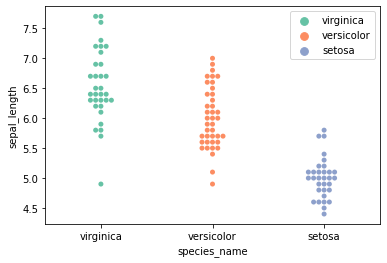

In [32]:
#2) Create a swarmplot using a melted dataframe of all your numeric variables. 
# The x-axis should be the variable name, the y-axis the measure. 
# Add another dimension using color to represent species. Document takeaways from 
# this visualization.

sns.swarmplot(x="species_name", y="sepal_length", data=train, hue="species_name", palette="Set2")
plt.legend()


In [58]:
#3) Create 4 subplots (2 rows x 2 columns) of scatterplots.

    # sepal_length x sepal_width
    
    # petal_length x petal_width
    
    # sepal_area x petal_area
    
    # sepal_length x petal_length

# What are your takeaways?

In [36]:
#4) Create a heatmap of each variable layering correlation coefficient on top.
sns.heatmap(test, annot=True, fmt="g", cmap='viridis')
plt.show()


ValueError: could not convert string to float: 'versicolor'

In [60]:
#5) Create a scatter matrix visualizing the interaction of each variable.


In [63]:
#6) Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.

    # Make sure to include a null hypothesis, alternative hypothesis, results, and summary.

    # What is your takeaway from this statistical testing?


In [64]:
#7) Create any other visualizations and run any other statistical tests you 
# think will be helpful in exploring this data set.